In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import scipy.stats as st

In [2]:
# Load cleaned listings csv's for Oct 2022 and 2023
l_df23 = pd.read_csv("listings_oct_2023_clean.csv")
l_df22 = pd.read_csv("listings_oct_2022_clean.csv")

In [3]:
# Assess the neccessary columns
l_df23.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'price', 'room_type', 'accommodates',
       'amenities', 'minimum_nights', 'minimum_minimum_nights',
       'review_scores_rating', 'review_scores_location', 'license',
       'reviews_per_month'],
      dtype='object')

In [4]:
# Evaluate the number of columns and Dtypes
l_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40545 non-null  int64  
 1   id                            40545 non-null  float64
 2   host_id                       40545 non-null  int64  
 3   host_listings_count           40522 non-null  float64
 4   neighbourhood_cleansed        40545 non-null  object 
 5   neighbourhood_group_cleansed  40545 non-null  object 
 6   latitude                      40545 non-null  float64
 7   longitude                     40545 non-null  float64
 8   property_type                 40545 non-null  object 
 9   price                         40545 non-null  object 
 10  room_type                     40545 non-null  object 
 11  accommodates                  40545 non-null  int64  
 12  amenities                     40545 non-null  object 
 13  m

In [5]:
#rearrange columns of df22 & df23 to have neighbourhood_group_cleansed as first column
rearrange_columns_22 = l_df22[["neighbourhood_group_cleansed","neighbourhood_cleansed","host_listings_count","latitude","longitude","minimum_nights","price","review_scores_rating","review_scores_location"]]
rearrange_columns_23 = l_df23[["neighbourhood_group_cleansed","neighbourhood_cleansed","host_listings_count","latitude","longitude","minimum_nights","price","review_scores_rating","review_scores_location"]]

#Dropping NaN in the 2022 & 2023 data
rearrange_columns_22_dropna = rearrange_columns_22.dropna()
rearrange_columns_23_dropna = rearrange_columns_23.dropna()


In [6]:
#Converting the price column from 2022 & 2023 data object to float
rearrange_columns_22_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)
rearrange_columns_23_dropna["price"] = rearrange_columns_23_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)

C:\Users\minh_\AppData\Local\Temp\ipykernel_35096\4056571151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_22_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)
C:\Users\minh_\AppData\Local\Temp\ipykernel_35096\4056571151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_23_dropna["price"] = rearrange_columns_23_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)


<font size="5">Number of Listings per Boroughs 2022 vs 2023</font>

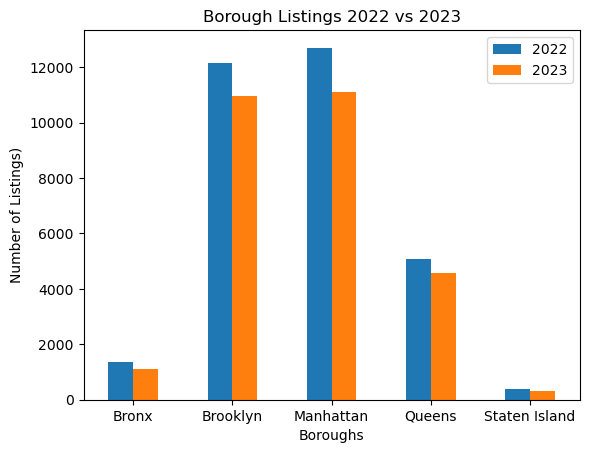

In [24]:
#Group data to the borough columns and take the count per borough
listing_count_22 = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()
listing_count_23 = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()

#Create a dataframe with 2022 and 2023 listing count
listing_count_vs = pd.DataFrame({
                              "2022": listing_count_22,
                              "2023": listing_count_23,
                             })

#Plot a bar graph that show the relationship between 2022 and 2023 number of listings
listing_count_vs.plot(kind="bar", title="Borough Listings 2022 vs 2023")
plt.xticks(rotation="horizontal")
plt.ylabel("Number of Listings)")
plt.xlabel("Boroughs")
plt.savefig("Borough Listings 2022 vs 2023")

plt.show()

<font size="5">Listing Price per Boroughs 2022 vs 2023</font>

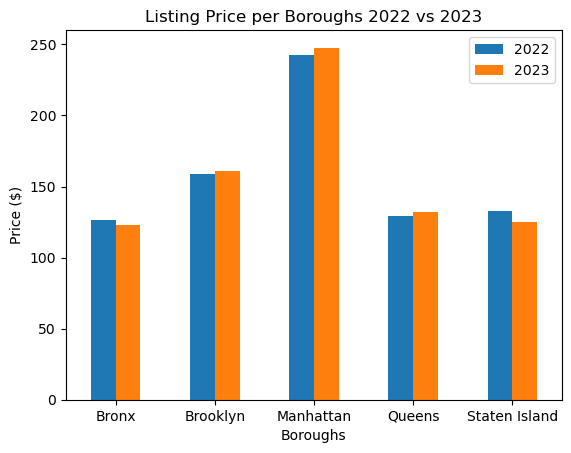

In [25]:
#Group data to the borough columns and take the average of the price
hood_group_22_price = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["price"].mean().round(2)
hood_group_23_price = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["price"].mean().round(2)

#Create a dataframe with 2022 and 2023 ratings
borough_price = pd.DataFrame({
                              "2022": hood_group_22_price,
                              "2023": hood_group_23_price,
                             })

#Plot a bar graph that show the relationship between 2022 and 2023 price
borough_price.plot(kind="bar", title="Listing Price per Boroughs 2022 vs 2023")
plt.xticks(rotation="horizontal")
plt.ylabel("Price ($)")
plt.xlabel("Boroughs")
plt.savefig("Listing Price per Boroughs 2022 vs 2023")

plt.show()

<font size="5">Borough Ratings 2022 vs 2023</font>

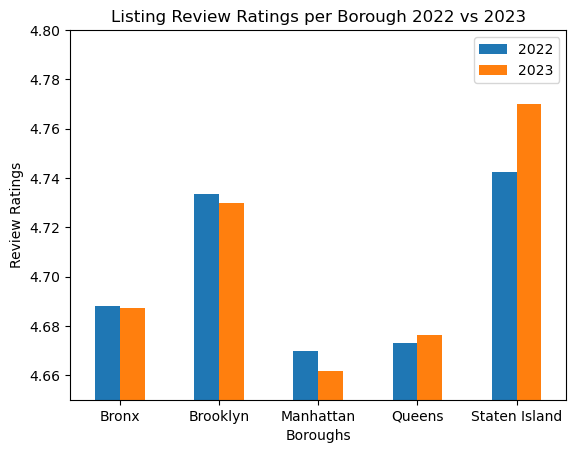

In [31]:
#Group data to the borough columns and take the average of the review scores
hood_group_22_rating = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()
hood_group_23_rating = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()

#Create a dataframe with 2022 and 2023 ratings
borough_rating = pd.DataFrame({
                              "2022": hood_group_22_rating,
                              "2023": hood_group_23_rating,
                             })

#Plot a bar graph that show the relationship between 2022 and 2023 ratings
borough_rating.plot(kind="bar", title="Listing Review Ratings per Borough 2022 vs 2023", ylim=(4.65,4.8))
plt.xticks(rotation="horizontal")
plt.ylabel("Review Ratings")
plt.xlabel("Boroughs")
plt.savefig("Listing Review Ratings per Borough 2022 vs 2023")

plt.show()

<font size="5">Borough Location Ratings 2022 vs 2023</font>

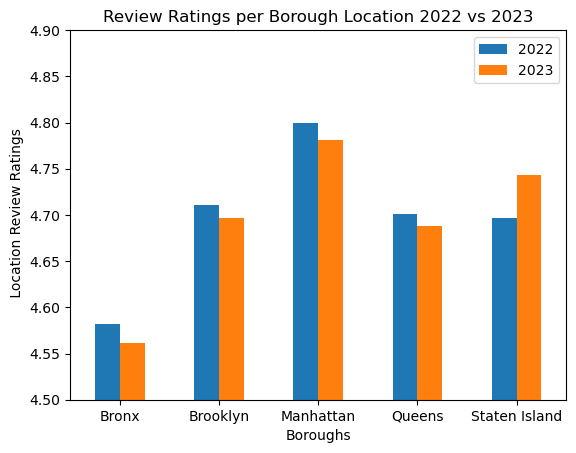

In [30]:
#Group data to the borough columns and take the average of the location review scores
hood_group_22_rating_location = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["review_scores_location"].mean()
hood_group_23_rating_location = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["review_scores_location"].mean()

#Create a dataframe with 2022 and 2023 ratings
borough_location_rating = pd.DataFrame({
                              "2022": hood_group_22_rating_location,
                              "2023": hood_group_23_rating_location,
                             })
borough_location_rating

#Plot a bar graph that show the relationship between 2022 and 2023 location ratings
borough_location_rating.plot(kind="bar", title="Review Ratings per Borough Location 2022 vs 2023", ylim=(4.5,4.9))
plt.xticks(rotation="horizontal")
plt.ylabel(" Location Review Ratings")
plt.xlabel("Boroughs")
plt.savefig("Review Ratings per Borough Location 2022 vs 2023")

plt.show()

<font size="5">Boroughs Price and Rating correlation</font>

The correlation between listing price and the review rating 0.02


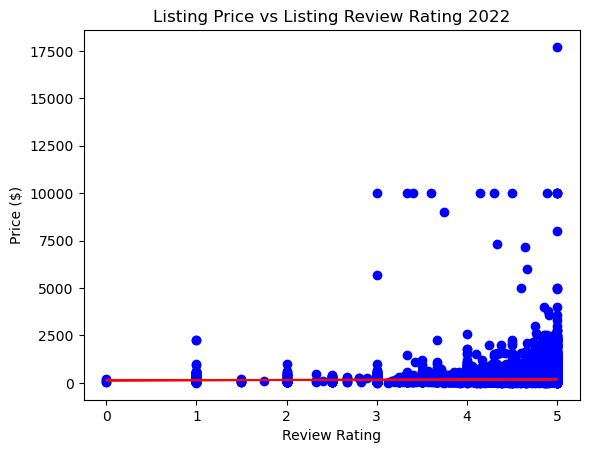

In [37]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_22 = st.pearsonr(rearrange_columns_22_dropna["review_scores_rating"],rearrange_columns_22_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_22[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_22_dropna["review_scores_rating"]
y_values = rearrange_columns_22_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Listing Review Rating 2022")
plt.savefig("Listing Price vs Listing Review Rating Correlation 2022")

plt.show()

The correlation between listing price and the review rating 0.02


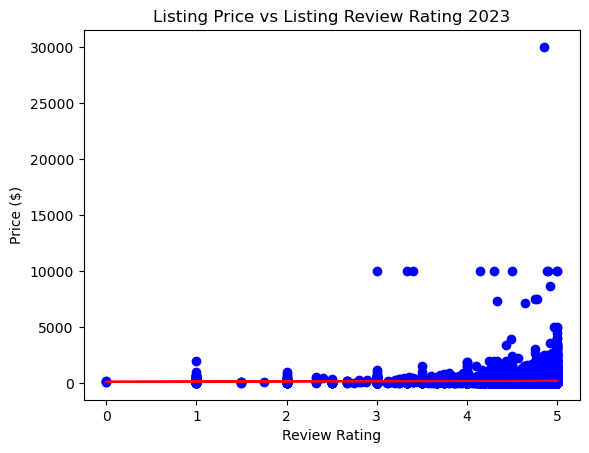

In [36]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_23 = st.pearsonr(rearrange_columns_23_dropna["review_scores_rating"],rearrange_columns_23_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_23[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_23_dropna["review_scores_rating"]
y_values = rearrange_columns_23_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Listing Review Rating 2023")
plt.savefig("Listing Price vs Listing Review Rating Correlation 2023")

plt.show()

The correlation between listing price and the review rating 0.05


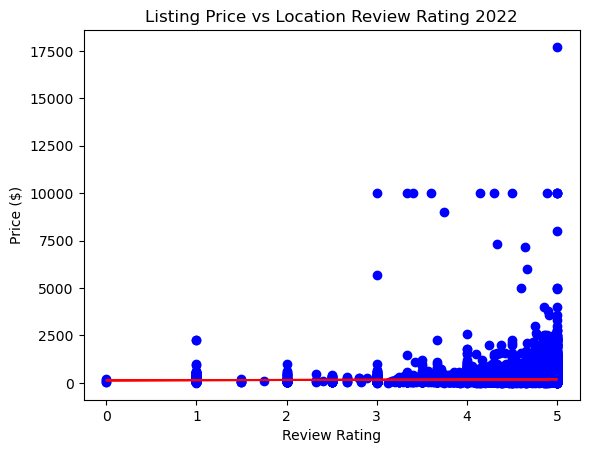

In [35]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_22_location = st.pearsonr(rearrange_columns_22_dropna["review_scores_location"],rearrange_columns_22_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_22_location[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_22_dropna["review_scores_rating"]
y_values = rearrange_columns_22_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Location Review Rating 2022")
plt.savefig("Listing Price vs Borough Location Review Rating 2022")

plt.show()

The correlation between listing price and the review rating 0.06


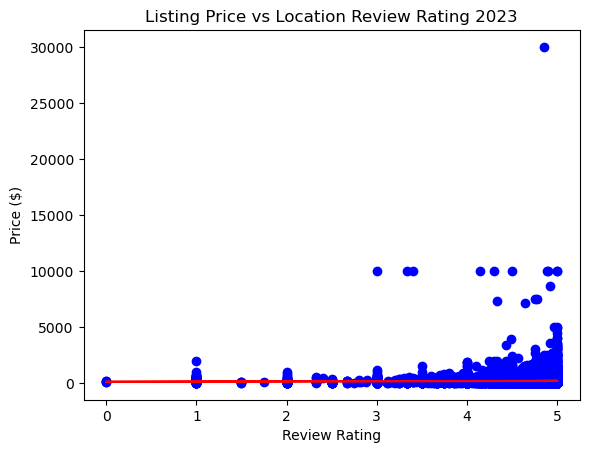

In [34]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_23_location = st.pearsonr(rearrange_columns_23_dropna["review_scores_location"],rearrange_columns_23_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_23_location[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_23_dropna["review_scores_rating"]
y_values = rearrange_columns_23_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Location Review Rating 2023")
plt.savefig("Listing Price vs Borough Location Review Rating 2023")
plt.show()

<font size="5">Number of Short-Term Listings (<30 days) per Boroughs</font>

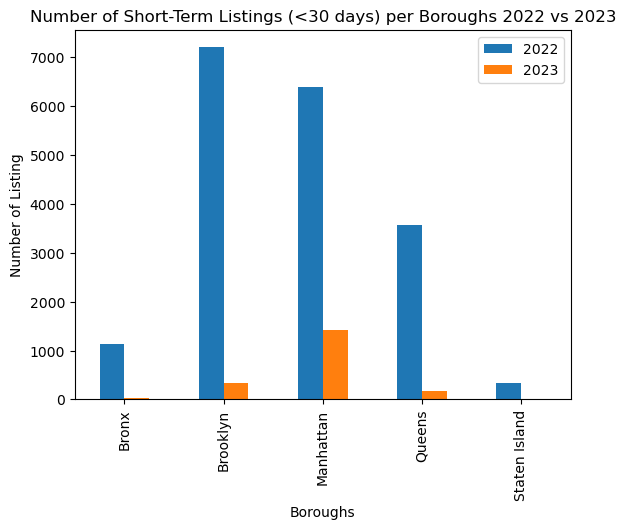

In [39]:
mini_night_1to29_2022 = rearrange_columns_22_dropna[rearrange_columns_22_dropna["minimum_nights"]<30]
mini_night_1to29_2022 = mini_night_1to29_2022.groupby("neighbourhood_group_cleansed")["minimum_nights"].count()
mini_night_1to29_2023 = rearrange_columns_23_dropna[rearrange_columns_23_dropna["minimum_nights"]<30]
mini_night_1to29_2023 = mini_night_1to29_2023.groupby("neighbourhood_group_cleansed")["minimum_nights"].count()

borough_mini_nights = pd.DataFrame({
                              "2022": mini_night_1to29_2022,
                              "2023": mini_night_1to29_2023,
                             })


borough_mini_nights.plot(kind="bar", title="Short-Term Listings (<30 days) per Boroughs 2022 vs 2023")
plt.ylabel("Number of Listing")
plt.xlabel("Boroughs")
plt.title("Number of Short-Term Listings (<30 days) per Boroughs 2022 vs 2023")
plt.savefig("Number of Short-Term Listings per Bourough 2022 vs 2023")

plt.show()

In [11]:
listing_count_22 = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()

listing_count_23 = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()
listing_count_22

neighbourhood_group_cleansed
Bronx             1354
Brooklyn         12140
Manhattan        12703
Queens            5096
Staten Island      396
Name: neighbourhood_group_cleansed, dtype: int64

The correlation between listing price and the review rating -0.05


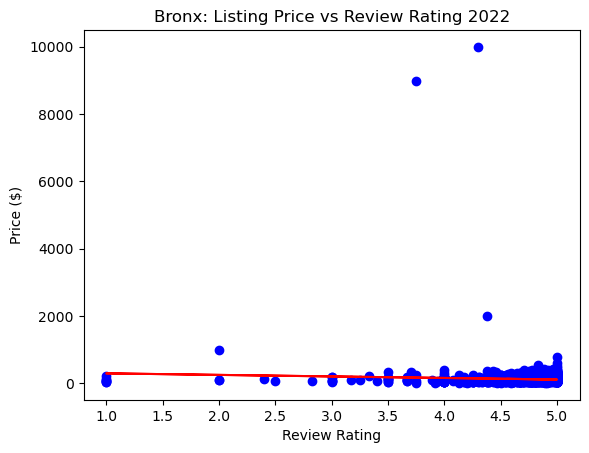

In [8]:
#Bronx
bronx_group = rearrange_columns_22_dropna[rearrange_columns_22_dropna["neighbourhood_group_cleansed"]=="Bronx"]

# Calculate the correlation coefficient and a linear regression model 
bronx_correlation_coefficient_22 = st.pearsonr(bronx_group["review_scores_rating"],bronx_group["price"])
print(f"The correlation between listing price and the review rating {round(bronx_correlation_coefficient_22[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = bronx_group["review_scores_rating"]
y_values = bronx_group["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Bronx: Listing Price vs Review Rating 2022")
plt.show()



The correlation between listing price and the review rating -0.05


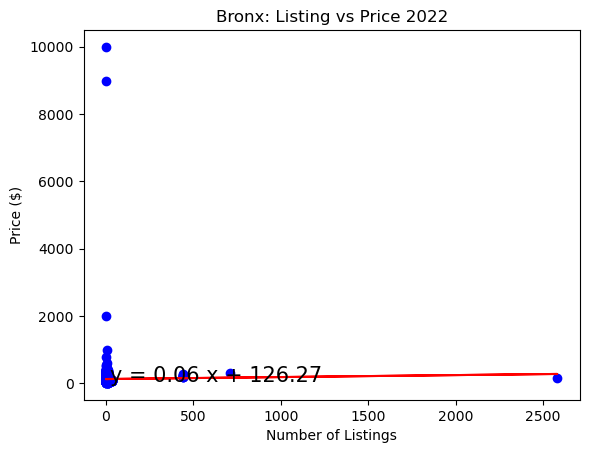

In [10]:
# Calculate the correlation coefficient and a linear regression model 
bronx_correlation_coefficient_22_listings = st.pearsonr(bronx_group["host_listings_count"],bronx_group["price"])
print(f"The correlation between listing price and the review rating {round(bronx_correlation_coefficient_22[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = bronx_group["host_listings_count"]
y_values = bronx_group["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Number of Listings")
plt.ylabel("Price ($)")
plt.title("Bronx: Listing vs Price 2022")
plt.show()

In [ ]:
#Brooklyn

In [ ]:
#Manhattan

In [ ]:
#Queens

In [ ]:
#Staten Island